29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


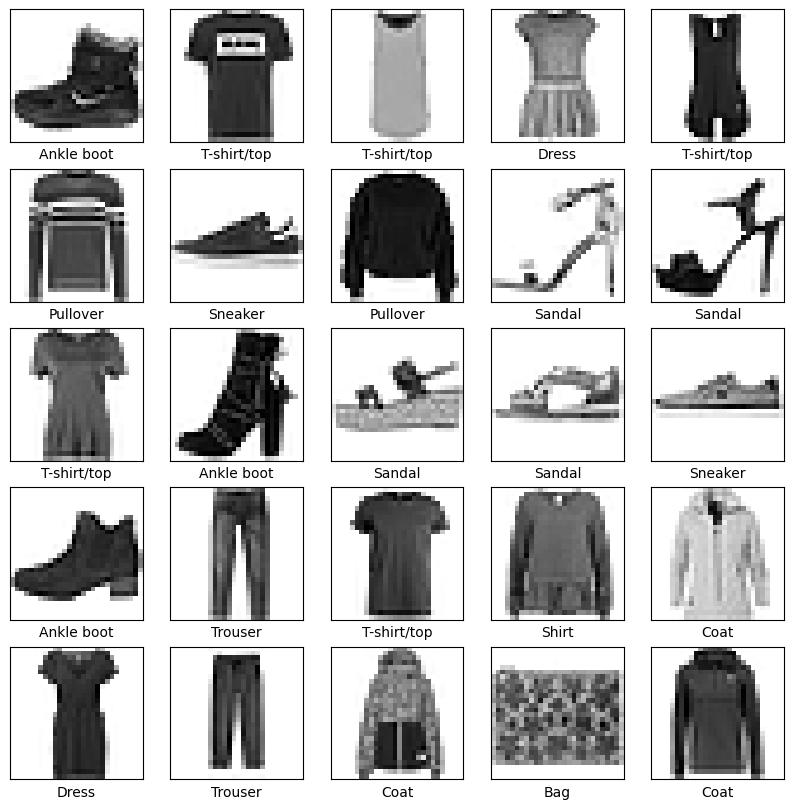

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


In [2]:
# Standard DNN Model
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

# ResNet-style DNN Model (with residual connections)
def create_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)

    # Residual block 1
    x1 = Dense(256, activation='relu')(x)
    x2 = Dense(256, activation='relu')(x1)
    res1 = Add()([x, x2])  # Skip connection
    res1 = Activation('relu')(res1)

    # Residual block 2
    x3 = Dense(128, activation='relu')(res1)
    x4 = Dense(128, activation='relu')(x3)
    # Need to match dimensions for the skip connection
    res1_down = Dense(128, activation='relu')(res1)  # Projection to match dimensions
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    # Final layers
    x_final = Dense(64, activation='relu')(res2)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)

In [3]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                 epochs=40,
                                 batch_size=128,
                                 validation_split=0.2,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7294 - loss: 0.7547 - val_accuracy: 0.8520 - val_loss: 0.4118
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8597 - loss: 0.3857 - val_accuracy: 0.8696 - val_loss: 0.3660
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8755 - loss: 0.3373 - val_accuracy: 0.8757 - val_loss: 0.3386
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8840 - loss: 0.3128 - val_accuracy: 0.8726 - val_loss: 0.3530
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8927 - loss: 0.2892 - val_accuracy: 0.8797 - val_loss: 0.3350
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8973 - loss: 0.2753 - val_accuracy: 0.8835 - val_loss: 0.3257
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9008 - loss: 0.2587 - val_accuracy: 0.8887 - val_loss: 0.3155
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9044 - loss: 0.2489 - val_accu

In [5]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

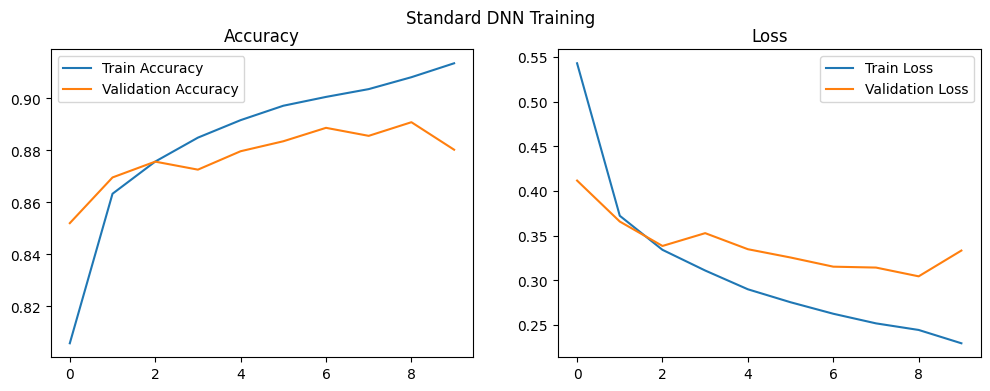

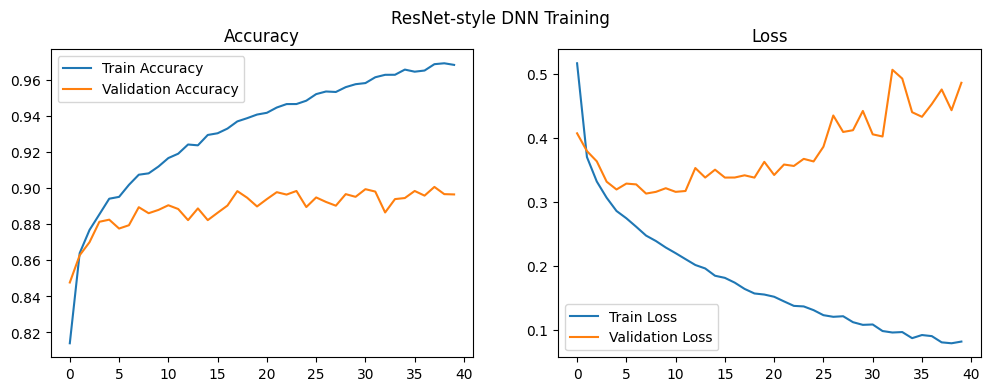

In [6]:
plot_history(resnet_history, "ResNet-style DNN Training")

In [7]:
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(
    x_test_flat, y_test, verbose=0
)

In [8]:
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

ResNet-style DNN Test Accuracy: 0.8890



ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


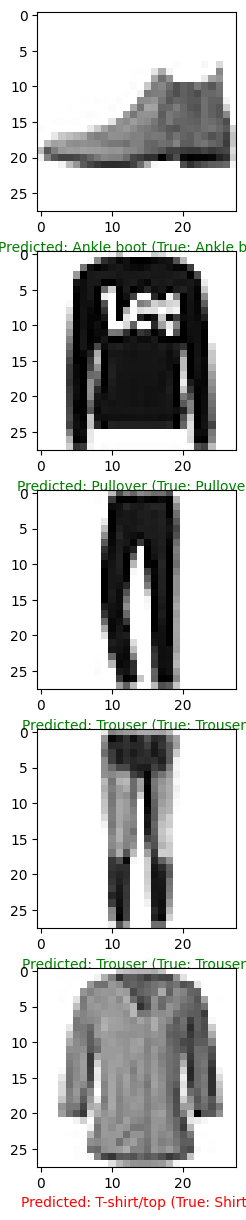

In [9]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = "green" if pred_label == true_label else "red"
        plt.xlabel(
            f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})",
            color=color,
        )
    plt.show()


print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)
